# Setup

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import cluster

In [2]:
INPUT_DIR = "../../data/input/"
OUTPUT_DIR = "../../data/output/"

# Load data

In [3]:
df = pd.read_csv(OUTPUT_DIR + "dataset.csv")
df.head()

,AvgCyclomatic,AvgCyclomaticModifiedRatio,AvgCyclomaticStrictRatio,AvgEssential,AvgLine,AvgLineBlankRatio,AvgLineCodeRatio,AvgLineCommentRatio,CountDeclClass,CountDeclClassMethodRatio,...,AvgCountClassBase,AvgCountClassCoupled,AvgCountClassDerived,MaxInheritanceTree,AvgPercentLackOfCohesion,AvgCountInput,AvgCountOutput,AvgCountPath,MaxNesting,Bug
0,1.0,1.0,1.0,1.0,9.0,0.000000,0.666667,0.111111,1.0,0.0,...,1.0,18.0,1.0,1.0,70.0,6.176471,3.941176,2.058824,2.0,0
1,2.0,1.0,1.0,1.0,8.0,0.000000,0.875000,0.000000,2.0,0.0,...,1.5,8.5,0.0,1.0,33.5,6.142857,3.142857,2.666667,3.0,0
2,2.0,1.0,1.0,1.0,14.0,0.071429,0.785714,0.071429,1.0,0.0,...,3.0,53.0,0.0,2.0,90.0,4.476190,4.142857,5.571429,4.0,0
3,2.0,1.0,1.0,1.0,29.0,0.034483,0.448276,0.482759,1.0,0.0,...,1.0,26.0,0.0,1.0,0.0,8.750000,5.750000,2.750000,2.0,0
4,2.0,1.0,1.5,1.0,17.0,0.117647,0.705882,0.117647,1.0,0.0,...,1.0,17.0,0.0,4.0,66.0,5.833333,8.500000,4.333333,2.0,0


# Correlation analysis

<AxesSubplot:>

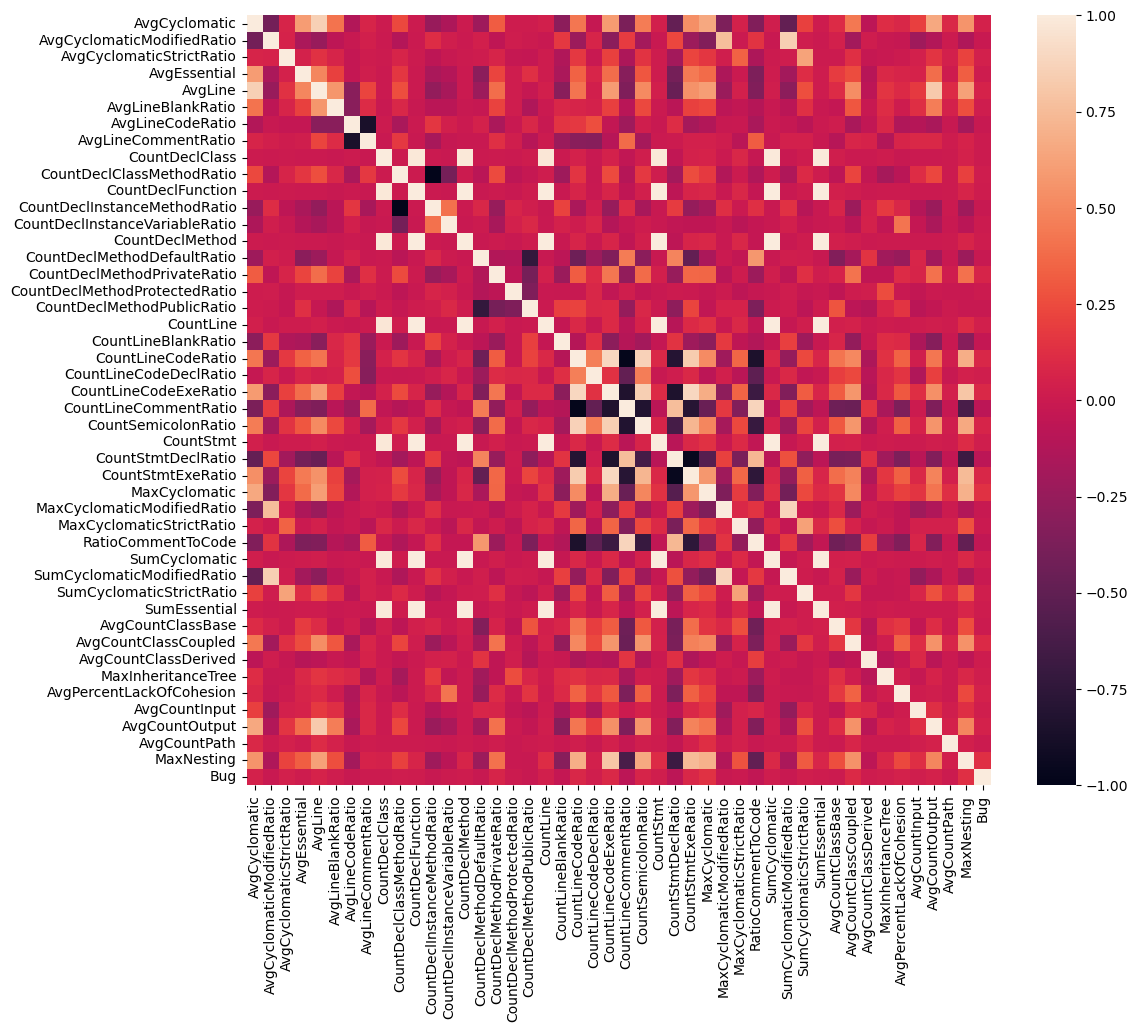

In [4]:
plt.figure(figsize=(12, 10))
r = df.corr()
sns.heatmap(r, vmin=-1, vmax=1)

## Variables clustering

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

dissimilarity = 1 - abs(r)
Z = linkage(squareform(dissimilarity), method="complete")

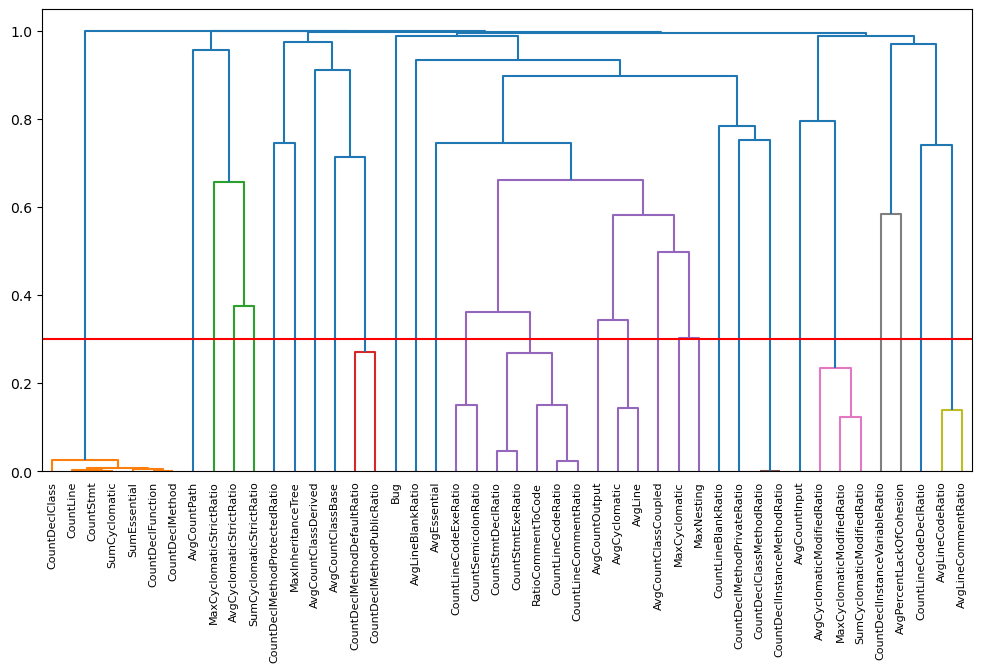

In [6]:

plt.figure(figsize=(12, 6))
dendrogram(Z, labels=df.columns, orientation="top", leaf_rotation=90)
plt.axhline(y = .3, c="red")

In [7]:
print(r.loc['CountDeclMethodProtectedRatio', 'MaxInheritanceTree'])
print(r.loc['CountDeclClassMethodRatio', 'CountDeclInstanceMethodRatio'])
df.columns

0.2551795445157892
-0.9999999999999983


Index(['AvgCyclomatic', 'AvgCyclomaticModifiedRatio',
       'AvgCyclomaticStrictRatio', 'AvgEssential', 'AvgLine',
       'AvgLineBlankRatio', 'AvgLineCodeRatio', 'AvgLineCommentRatio',
       'CountDeclClass', 'CountDeclClassMethodRatio', 'CountDeclFunction',
       'CountDeclInstanceMethodRatio', 'CountDeclInstanceVariableRatio',
       'CountDeclMethod', 'CountDeclMethodDefaultRatio',
       'CountDeclMethodPrivateRatio', 'CountDeclMethodProtectedRatio',
       'CountDeclMethodPublicRatio', 'CountLine', 'CountLineBlankRatio',
       'CountLineCodeRatio', 'CountLineCodeDeclRatio', 'CountLineCodeExeRatio',
       'CountLineCommentRatio', 'CountSemicolonRatio', 'CountStmt',
       'CountStmtDeclRatio', 'CountStmtExeRatio', 'MaxCyclomatic',
       'MaxCyclomaticModifiedRatio', 'MaxCyclomaticStrictRatio',
       'RatioCommentToCode', 'SumCyclomatic', 'SumCyclomaticModifiedRatio',
       'SumCyclomaticStrictRatio', 'SumEssential', 'AvgCountClassBase',
       'AvgCountClassCoupled', 'AvgC